#Galaxy Classification 🚀

## What is a Galaxy? 
A galaxy is a huge collection of gas, dust, and billions of stars and their solar systems, all held together by gravity.

##Why Classify Galaxies?
Classifying galaxies help us in understanding the evolutionary properties of such galaxies, its structure, its age, its formation etc. 

## Hubble Classification: 
![Hubble Classification](https://drive.google.com/uc?export=view&id=1nb98_0nUkBXD8SRte9tXYkUxxjwo4ZqZ)

In 1926, Edwin Hubble proposed a classification scheme to classify galaxies. They are broadly classified into the following types: 


🌟   Ellipticals
🌟   Spirals 
🌟   Lenticular 
🌟   Barred Spirals 
🌟   Irregulars/Mergers. 

Ellipticals are classified on the basis of elongation with E0 being the most circular to E7 being the most elongated. Elliptical Galaxies are usually red in color which indicate its young age and low amout of heat. 

Spirals are classified on the basis of disc or bulging like structure. 

A disc like structure indicates the prescence of stars and other planetary objects in a circular orbit. A Bulge like prescence on the other hand have stars/objects in a random orbit. Can be formed by collision of two galaxies or other collapse of internal gases within the region. 

Spiral galaxies are usually blue in colour due its high heat. This also indicates that the these type of galaxies have a low life comparatively to elliptical galaxies. 

There's a second type of spiral galaxies called barred galaxies. 

Lenticular structures (S0) have a disk and a bulge. 





#Decision Tree Classifier
Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions, similarly to how humans make decisions.

One way to think of a Machine Learning classification algorithm is that it is built to make decisions.

You usually say the model predicts the class of the new, never-seen-before input but, behind the scenes, the algorithm has to decide which class to assign.

In plain english, we make decisions either on the basis of rules or on the basis of which is more likely to happen (Probabilistic) Imagine the nodes to be a set of if statements for specific parameters with the output as a yes or no answer and the leaf nodes as the result. 

![Galaxy Classification Trees](https://drive.google.com/uc?export=view&id=1bvQN4oZABirJU7F3_s4k-0I_eqI96FoT)

Lets Classify Galaxies by hand!!
https://www.zooniverse.org/projects/zookeeper/galaxy-zoo/classify



In [ ]:
!git clone https://github.com/jesherjoshua/WSW_datasets


fatal: destination path 'WSW_datasets' already exists and is not an empty directory.


In [ ]:
import itertools

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive

In [ ]:
def splitdata_train_test(data, fraction_training):
    # Shuffle the data
    np.random.shuffle(data)
    print(data)
    # Split the data
    limit = int(len(data)*fraction_training)
    training = data[0:limit]
    testing = data[limit:]
    
    return training, testing


def main():
    data = np.load('/content/WSW_datasets/galaxy_classification/galaxy_catalogue.npy')
    

    # set the fraction of data which should be in the training set
    fraction_training = 0.6

    # split the data using your function
    training, testing = splitdata_train_test(data, fraction_training)

    # print the key values
    print('Number data galaxies:', len(data))
    print('Train fraction:', fraction_training)
    print('Number of galaxies in training set:', len(training))
    print('Number of galaxies in testing set:', len(testing))


main()

[( 0.94621,  0.37307,  0.30599,  0.15662, 0.5285723,  2.267105e+00,  2.169257e+00,  2.251157e+00,  2.252156e+00,  2.232075e+00,  1.510999e+00,   1.884275 ,  1.760716e+00,  3.191223e+00,   4.983276,  5.165258e+00, 'merger')
 ( 1.60443,  0.72878,  0.40323,  0.25179, 0.7865174,  2.032104e+00,  2.272189e+00,  2.422859e+00,  2.470503e+00,  2.547166e+00,  5.454755e+00,   5.187619 ,  4.945479e+00,  9.772322e+00,  10.26835 ,  1.054704e+01, 'spiral')
 ( 1.83243,  0.84321,  0.40831,  0.325  , 0.748357 ,  2.265874e+00,  2.312460e+00,  2.370642e+00,  2.415184e+00,  2.407215e+00,  2.760698e+00,   2.297382 ,  2.176481e+00,  7.485567e+00,   6.939061,  6.804561e+00, 'elliptical')
 ( 0.95174,  0.51082,  0.4257 ,  0.29233, 0.7356   ,  2.352855e+00,  2.376356e+00,  2.446455e+00,  2.479741e+00,  2.466861e+00,  3.959873e+00,   4.461379 ,  3.795087e+00,  1.297139e+01,  13.9767  ,  1.208755e+01, 'merger')
 ( 1.2925 ,  0.7172 ,  0.37212,  0.25278, 0.7824368,  2.263781e+00,  2.532413e+00,  2.632492e+00,  2.583

In [ ]:
def generate_features_targets(data):
    targets = data['class']

    features = np.empty(shape=(len(data), 13))
    features[:, 0] = data['u-g'] 
    features[:, 1] = data['g-r']
    features[:, 2] = data['r-i']
    features[:, 3] = data['i-z']
    features[:, 4] = data['ecc']
    features[:, 5] = data['m4_u']
    features[:, 6] = data['m4_g']
    features[:, 7] = data['m4_r']
    features[:, 8] = data['m4_i']
    features[:, 9] = data['m4_z']

    # concentration in u filter
    features[:, 10] = data['petroR50_u']/data['petroR90_u']
    # concentration in r filter
    features[:, 11] = data['petroR50_r']/data['petroR90_r']
    # concentration in z filter
    features[:, 12] = data['petroR50_z']/data['petroR90_z']

    return features, targets


def main():
  data = np.load('/content/WSW_datasets/galaxy_classification/galaxy_catalogue.npy')

  features, targets = generate_features_targets(data)

  # The shape of each array to check the arrays are the correct dimensions 
  
  print("Features shape:", features.shape)
  print("Targets shape:", targets.shape)


main()

Features shape: (780, 13)
Targets shape: (780,)


## Features we're gonna use: 
**Colour indices (u-g, g-r, r-i, and i-z):** Colours correspond to the wavelengths of the light we observe. Longer wavelengths appear red and shorter wavelengths appear blue or violet. Similarly, the astronomical colour (or colour index) is the difference between the magnitudes of two filters, i.e. u - g or i - z.

Studies of galaxy evolution tell us that spiral galaxies have younger star populations and therefore are 'bluer' (brighter at lower wavelengths). Elliptical galaxies have an older star population and are brighter at higher wavelengths ('redder').


![SDSS Reference Spectrum](https://drive.google.com/uc?export=view&id=1JTn8w03DuZQXH5eNVV5PDHwf9EJWP-CD)

**Eccentricity** approximates the shape of the galaxy by fitting an ellipse to its profile. Eccentricity is the ratio of the two axis (semi-major and semi-minor). 

**Adaptive moments** are a measured quantity to describe the shape of a galaxy. They are used in image analysis to detect similar objects at different sizes and orientations. We use the fourth moment here for each band.[Read More](https://www.sdss.org/dr16/algorithms/classify/#AdaptiveMoments)

**Concentration** is similar to the luminosity profile of the galaxy, which measures what proportion of a galaxy's total light is emitted within what radius. A simplified way to represent this is to take the ratio of the radii containing 50% and 90% of the Petrosian flux.

The Petrosian method allows us to compare the radial profiles of galaxies at different distances.
![Petrosian Concentration Method](https://drive.google.com/uc?export=view&id=1CxEHJJPfhKqFNlHBEaG0Fnwj8qQVBjgD)

[Read More](http://spiff.rit.edu/classes/phys443/lectures/gal_1/petro/petro.html)











In [ ]:
def dtc_predict_actual(data):
    # split the data into training and testing sets using a training
    # fraction of 0.7
    training, testing = splitdata_train_test(data, 0.7)

    # generate the feature and targets for the training and test sets
    # i.e. train_features, train_targets, test_features, test_targets
    train_features, train_targets = generate_features_targets(training)
    test_features, test_targets = generate_features_targets(testing)

    # instantiate a decision tree classifier
    dtr = DecisionTreeClassifier()

    # train the classifier with the train_features and train_targets
    dtr.fit(train_features, train_targets)

    # get predictions for the test_features
    predictions = dtr.predict(test_features)

    # return the predictions and the test_targets
    return predictions, test_targets


def main():
    data = np.load('/content/WSW_datasets/galaxy_classification/galaxy_catalogue.npy')
    
    predicted_class, actual_class = dtc_predict_actual(data)

    # Print some of the initial results
    print("Some initial results...\n   predicted,  actual")
    for i in range(10):
        print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))


main()

[( 1.09237,  0.54345,  0.35413,  0.18402, 0.6071323,  2.393683e+00,  2.431448e+00,  2.508439e+00,  2.544037e+00,  2.537546e+00,  2.973714e+00,   2.738492 ,  2.103480e+00,  5.947423e+00,   6.167646,  4.320204e+00, 'spiral')
 ( 1.20485,  0.45503,  0.31581,  0.17195, 0.6138686,  2.350678e+00,  2.336337e+00,  2.397791e+00,  2.429457e+00,  2.451553e+00,  3.197163e+00,   3.014265 ,  2.769616e+00,  6.750811e+00,   6.461692,  6.055292e+00, 'spiral')
 ( 1.3411 ,  0.64719,  0.33467,  0.2011 , 0.4882304,  2.167428e+00,  2.180869e+00,  2.357647e+00,  2.369919e+00,  2.414510e+00,  5.963836e+00,   4.725285 ,  4.107449e+00,  1.021750e+01,  10.12839 ,  8.266510e+00, 'spiral')
 ( 2.05876,  1.16716,  0.45311,  0.34442, 0.7978799,  2.313888e+00,  2.431600e+00,  2.426149e+00,  2.429870e+00,  2.436303e+00,  3.710289e+00,   3.744875 ,  3.313678e+00,  6.267799e+00,  11.49    ,  1.057518e+01, 'elliptical')
 ( 1.93122,  1.06486,  0.43941,  0.36051, 0.8648866,  2.216719e+00,  2.352305e+00,  2.377028e+00,  2.395

Our accuracy score: 0.7794871794871795
Confusion matrix, without normalization
[[175  59  26]
 [ 53 201   6]
 [ 24   4 232]]


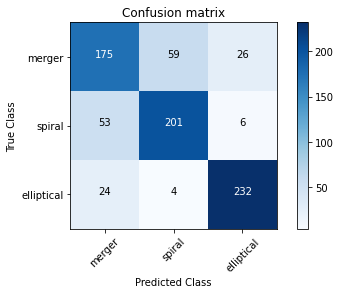

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')


def calculate_accuracy(predicted, actual):
    correct = sum(predicted == actual)
    return correct/(len(predicted))


def main():
    data = np.load('/content/WSW_datasets/galaxy_classification/galaxy_catalogue.npy')

    # split the data
    features, targets = generate_features_targets(data)

    # train the model to get predicted and actual classes
    dtc = DecisionTreeClassifier()
    predicted = cross_val_predict(dtc, features, targets, cv=10)

    # calculate the model score using your function
    model_score = calculate_accuracy(predicted, targets)
    print("Our accuracy score:", model_score)

    # calculate the models confusion matrix using sklearns confusion_matrix
    class_labels = list(set(targets))
    model_cm = confusion_matrix(y_true=targets, y_pred=predicted,
                                labels=class_labels)

    # Plot the confusion matrix using the provided functions.
    plt.figure()
    plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
    plt.show()


main()

## Ensemble Classifiers
Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.
The key objective of the ensemble methods is to reduce bias and variance.


##Random Forest Classifier
Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.



Accuracy score: 0.8756410256410256
Confusion matrix, without normalization
[[217  31  12]
 [ 39 219   2]
 [ 12   1 247]]


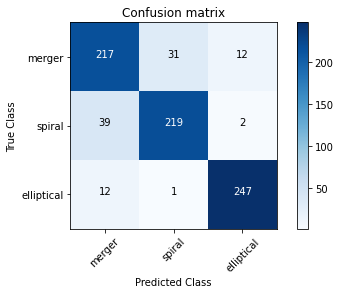

In [ ]:
def rf_predict_actual(data, n_estimators):
    # generate the features and targets
    features, targets = generate_features_targets(data)

    # instantiate a random forest classifier using n estimators
    rfc = RandomForestClassifier(n_estimators=n_estimators)
  
    # get predictions using 10-fold cross validation with cross_val_predict
    predicted = cross_val_predict(rfc, features, targets, cv=10)

    # return the predictions and their actual classes
    return predicted, targets


def main():
    data = np.load('/content/WSW_datasets/galaxy_classification/galaxy_catalogue.npy')

    # get the predicted and actual classes
    number_estimators = 50             # Number of trees
    predicted, actual = rf_predict_actual(data, number_estimators)

    # calculate the model score using your function
    accuracy = calculate_accuracy(predicted, actual)
    print("Accuracy score:", accuracy)

    # calculate the models confusion matrix using sklearns confusion_matrix
    class_labels = list(set(actual))
    model_cm = confusion_matrix(y_true=actual, y_pred=predicted,
                                labels=class_labels)

    # plot the confusion matrix using the provided functions.
    plt.figure()
    plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
    plt.show()


main()